In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Preprocessing

In [2]:
#this function takes the text from the csv and preprocesses it 
#(changes to lower case, sent tokenzies, word tokenizes,
#removes unnecessary characters, lemmatizes, and puts it in a dataframe)
#help for this function was used from https://git.generalassemb.ly/dsi-911/504-lesson-nlp-i/blob/master/solution-code/solution-code.ipynb

def preprocessing(dataframe, title_text_col):
    lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer('\w+')
    text = dataframe[title_text_col]
    
    lemmatized_data = []
    
    df_text = [sent_tokenize(t) for t in text]
    
    for sentences in df_text:
        sentence = []
        for s in sentences:
            words = tokenizer.tokenize(s)
            words_lemmatized = [lemmatizer.lemmatize(word.lower()) for word in words]
            sentences_lemmatized = ' '.join(words_lemmatized)
            sentence.append(sentences_lemmatized)  
        lemmatized_data.append(sentence)
    
    df_lemm = [' '.join(s) for s in lemmatized_data]
    new_df = pd.DataFrame({'title_text': df_lemm, 'subreddit': dataframe['subreddit']})
    return new_df

# Fitness

In [3]:
#reading in the fitness csv and dropping the self_text column because it is empty
fitness = pd.read_csv('./data/fitness.csv')
fitness.drop(['self_text'], axis=1, inplace=True)
fitness.head()

,created_utc,title,subreddit,title_text
0,2023-10-17 09:00:48,"Daily Simple Questions Thread - October 17, 2023",Fitness,"Daily Simple Questions Thread - October 17, 20..."
1,2023-10-16 07:02:00,Moronic Monday - Your weekly stupid questions ...,Fitness,Moronic Monday - Your weekly stupid questions ...
2,2023-10-15 09:00:40,"Daily Simple Questions Thread - October 15, 2023",Fitness,"Daily Simple Questions Thread - October 15, 20..."
3,2023-10-15 09:00:21,Victory Sunday,Fitness,Victory Sunday-**Welcome to the Victory Sunday...
4,2023-10-15 09:00:20,Monthly Fitness Pro-Tips Megathread,Fitness,Monthly Fitness Pro-Tips Megathread-**Welcome ...


In [4]:
preprocessing(fitness, 'title_text')

,title_text,subreddit
0,daily simple question thread october 17 2023 w...,Fitness
1,moronic monday your weekly stupid question thr...,Fitness
2,daily simple question thread october 15 2023 w...,Fitness
3,victory sunday welcome to the victory sunday t...,Fitness
4,monthly fitness pro tip megathread welcome to ...,Fitness
...,...,...
962,daily simple question thread july 08 2022 welc...,Fitness
963,how to convince myself to not overreach overtr...,Fitness
964,daily simple question thread july 07 2022 welc...,Fitness
965,rant wednesday welcome to rant wednesday it s ...,Fitness


In [5]:
X = fitness['title_text']
y = fitness['subreddit']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### CountVectorizer

In [7]:
cvec = CountVectorizer(stop_words='english')

In [8]:
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [9]:
X_train = cvec.transform(X_train)

In [10]:
X_test = cvec.transform(X_test)

In [11]:
X_train_df = pd.DataFrame(X_train.todense(), columns=cvec.get_feature_names_out())

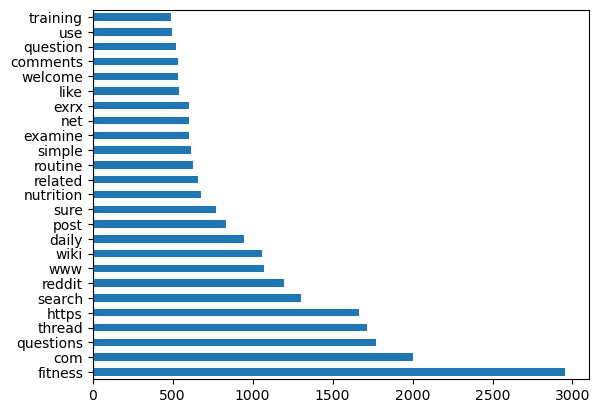

In [12]:
X_train_df.sum().sort_values(ascending=False).head(25).plot(kind='barh');

# Nutrition

In [13]:
#reading in the nutrition csv
nutrition = pd.read_csv('./data/nutrition.csv')
nutrition.head()

,created_utc,title,self_text,subreddit,title_text
0,2023-10-17 18:14:29,Protein cookies?,Okay I'm a sucker for snack bars- like the ONE...,nutrition,Protein cookies?-Okay I'm a sucker for snack b...
1,2023-10-17 17:52:27,What's most important in a snack bar?,I was on my weekly target run with my friend N...,nutrition,What's most important in a snack bar?-I was on...
2,2023-10-17 17:27:29,Bj's Wholesale Protein,May anyone who shops at bj's drop their afford...,nutrition,Bj's Wholesale Protein-May anyone who shops at...
3,2023-10-17 16:18:16,Real vs. artificial sweetener and the gut micr...,"To this old brain, the reams of medical butt-b...",nutrition,Real vs. artificial sweetener and the gut micr...
4,2023-10-17 15:38:48,Athletic greens? For a freind who doesn't like...,I have a freind who doesn't like eating vegeta...,nutrition,Athletic greens? For a freind who doesn't like...


In [14]:
preprocessing(nutrition, 'title_text')

,title_text,subreddit
0,protein cooky okay i m a sucker for snack bar ...,nutrition
1,what s most important in a snack bar i wa on m...,nutrition
2,bj s wholesale protein may anyone who shop at ...,nutrition
3,real v artificial sweetener and the gut microb...,nutrition
4,athletic green for a freind who doesn t like v...,nutrition
...,...,...
947,percentage don t add up to 100 hi all i m work...,nutrition
948,is iodized sea salt a good replacement for ele...,nutrition
949,question about vitamin intake would it make mo...,nutrition
950,propel nutrient fact so propels nutrient fact ...,nutrition


In [15]:
X = nutrition['title_text']
y = nutrition['subreddit']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### CountVectorizer

In [17]:
cvec2 = CountVectorizer(stop_words='english')

In [18]:
cvec2.fit(X_train)

CountVectorizer(stop_words='english')

In [19]:
X_train2 = cvec.transform(X_train)

In [20]:
X_test2 = cvec.transform(X_test)

In [21]:
X_train_df2 = pd.DataFrame(X_train2.todense(), columns=cvec.get_feature_names_out())

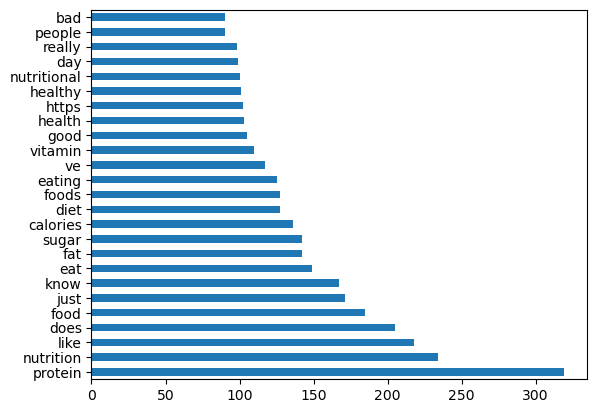

In [22]:
X_train_df2.sum().sort_values(ascending=False).head(25).plot(kind='barh');

# Fitness and Nutrition Combined

In [23]:
# combining the two dfs
combined_df = pd.concat([fitness, nutrition], axis=0)
combined_df.head()

,created_utc,title,subreddit,title_text,self_text
0,2023-10-17 09:00:48,"Daily Simple Questions Thread - October 17, 2023",Fitness,"Daily Simple Questions Thread - October 17, 20...",NaN
1,2023-10-16 07:02:00,Moronic Monday - Your weekly stupid questions ...,Fitness,Moronic Monday - Your weekly stupid questions ...,NaN
2,2023-10-15 09:00:40,"Daily Simple Questions Thread - October 15, 2023",Fitness,"Daily Simple Questions Thread - October 15, 20...",NaN
3,2023-10-15 09:00:21,Victory Sunday,Fitness,Victory Sunday-**Welcome to the Victory Sunday...,NaN
4,2023-10-15 09:00:20,Monthly Fitness Pro-Tips Megathread,Fitness,Monthly Fitness Pro-Tips Megathread-**Welcome ...,NaN


### CountVectorizer

In [24]:
X = combined_df['title_text']
y = combined_df['subreddit']

In [25]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, random_state=42)

In [26]:
cvec3 = CountVectorizer(stop_words='english')

In [27]:
cvec3.fit(X_train3)

CountVectorizer(stop_words='english')

In [28]:
X_train3_transformed = cvec3.transform(X_train3)

In [29]:
X_test3_transformed = cvec3.transform(X_test3)

In [30]:
X_train_df3 = pd.DataFrame(X_train3_transformed.todense(), columns=cvec3.get_feature_names_out())

### Random Forest Classifier

In [31]:
rf = RandomForestClassifier(oob_score=True, max_features='sqrt')
rf.fit(X_train3_transformed, y_train3)

RandomForestClassifier(oob_score=True)

In [32]:
rf.score(X_train3_transformed, y_train3)

1.0

In [33]:
rf.score(X_test3_transformed, y_test3)

0.9333333333333333

In [34]:
rf.oob_score_

0.9562195969423211

In [65]:
pd.DataFrame({
    'features': cvec3.get_feature_names_out(),
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).head(15)

,features,importance
8644,welcome,0.032571
8060,thread,0.030860
3585,fitness,0.023179
4021,gym,0.020953
6961,routine,0.016630
2213,comments,0.016487
3335,exercises,0.016073
5206,memes,0.015697
7217,share,0.014463
4922,limiter,0.011667


### Metrics

In [36]:
#predictions
y_pred = rf.predict(X_test3_transformed)

In [37]:
#precision
precision_fitness = precision_score(y_test3, y_pred, pos_label='Fitness')
precision_nutrition = precision_score(y_test3, y_pred, pos_label='nutrition')
precision_fitness, precision_nutrition

(1.0, 0.8796992481203008)

In [38]:
#recall
recall_fitness = recall_score(y_test3, y_pred, pos_label='Fitness')
recall_nutrition = recall_score(y_test3, y_pred, pos_label='nutrition')
recall_fitness, recall_nutrition

(0.8699186991869918, 1.0)

In [39]:
#f1 score
f1_fitness = f1_score(y_test3, y_pred, pos_label='Fitness')
f1_nutrition = f1_score(y_test3, y_pred, pos_label='nutrition')
f1_fitness, f1_nutrition

(0.9304347826086956, 0.936)

In [40]:
#confusion matrix
confusion = confusion_matrix(y_test3, y_pred)
confusion

array([[214,  32],
       [  0, 234]], dtype=int64)

### Logistic Regression

In [52]:
lr = LogisticRegression(penalty = 'l1', solver='liblinear')

lr.fit(X_train3_transformed, y_train3)

LogisticRegression(penalty='l1', solver='liblinear')

In [56]:
preds = lr.predict(X_test3_transformed)

In [58]:
lr.score(X_train3_transformed, y_train3)

0.9944405837387075

In [59]:
lr.score(X_test3_transformed, y_test3)

0.95

### Metrics

In [60]:
#precision
precision_fitness_lr = precision_score(y_test3, preds, pos_label='Fitness')
precision_nutrition_lr = precision_score(y_test3, preds, pos_label='nutrition')
precision_fitness_lr, precision_nutrition_lr

(0.9868421052631579, 0.9166666666666666)

In [61]:
#recall
recall_fitness_lr = recall_score(y_test3, preds, pos_label='Fitness')
recall_nutrition_lr = recall_score(y_test3, preds, pos_label='nutrition')
recall_fitness_lr, recall_nutrition_lr

(0.9146341463414634, 0.9871794871794872)

In [62]:
#f1 score
f1_fitness_lr = f1_score(y_test3, preds, pos_label='Fitness')
f1_nutrition_lr = f1_score(y_test3, preds, pos_label='nutrition')
f1_fitness_lr, f1_nutrition_lr

(0.949367088607595, 0.9506172839506173)

In [63]:
#confusion matrix
confusion_lr = confusion_matrix(y_test3, preds)
confusion_lr

array([[225,  21],
       [  3, 231]], dtype=int64)